In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''
Important to note that NPE does not return the actual dimension reduced 
data. Instead, NPE returns dxN matrix, d the target dimension, 
N the original ambient dimension. Multiply data matrix by this to get 
dimension reduction. demo included below
'''

'\nImportant to note that NPE does not return the actual dimension reduced \ndata. Instead, NPE returns dxN matrix, d the target dimension, \nN the original ambient dimension. Multiply data matrix by this to get \ndimension reduction. demo included below\n'

In [9]:
def p1solver(data, x, neighbors, k):
    Z = data[neighbors].T
    Z = Z - np.repeat(x.T, len(neighbors), axis=0).reshape(data.shape[1], len(neighbors))
    C = Z.T @ Z
    w = np.linalg.solve(C, np.ones(len(neighbors)))
    w_final = np.zeros(len(data))
    w_final[neighbors] = w
    return w_final / np.sum(w_final)

def knn(k, data, test):
    return np.argsort(np.sum(data**2, axis=1) - 2 * test.dot(data.T), axis=0)[1:k+1]

def NPEsolver(X, W, k): 
    I = np.identity(X.shape[1])
    M = (I-W).T @ (I-W) #1000 x 1000
    T1 = np.linalg.inv(X @ X.T) # 
    T2 = X @ M @ X.T
    evalues, evectors = np.linalg.eigh(T1 @ T2)
    Y = evectors[: , 1:k+1]
    return Y

def NPE(X, k, n_neighbors): 
    W = []
    for i in range((len(X))): 
        neighbors = knn(n_neighbors, X, X[i])
        W.append(p1solver(X, X[i], neighbors, k))
    W = np.asarray(W)
    return NPEsolver(X.T, W, k)


(3, 1000) (1000, 1000)
(3, 2)


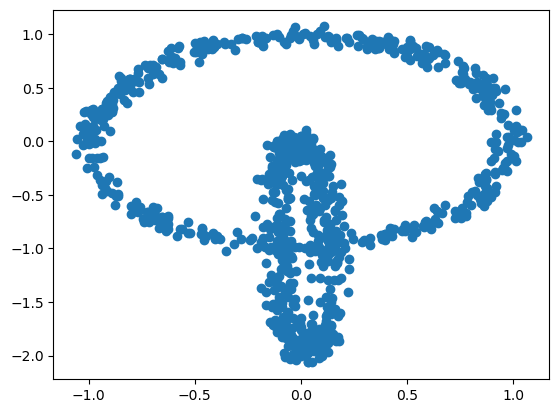

In [11]:
data3 = []
with open('ps2-data-2.txt', 'r') as file: 
    tsv_reader = csv.reader(file, delimiter='\t')
    for row in tsv_reader: 
        data3.append(row[1:])
data3 = np.asarray(data3).astype(np.float64)
output = NPE(data3, 2, 200)
print(output.shape)
NPE_ = (output.T @ (data3.T)).T
x, y = zip(*NPE_)
plt.scatter(x, y)